# Математический анализ в контексте задачи оптимизации. Часть 3

## Введение

### Задание 2.7
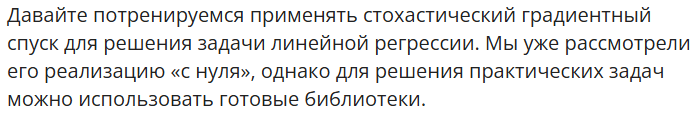

In [3]:
#Загрузим стандартный датасет об алмазах 
import pandas as pd
import numpy as np
import seaborn as sns
df = sns.load_dataset('diamonds')

In [4]:
#Удаляем часть признаков
df.drop(['depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [5]:
#Закодируем категориальные признаки
df = pd.get_dummies(df, drop_first=True)

In [6]:
#Логарифмируем призанки
df['catat'] = np.log(1+df['carat'])
df['price'] = np.log(1+df['price'])

In [7]:
#Определяем целевую переменную и предикторы
X = df.drop(columns='price')
y = df['price']

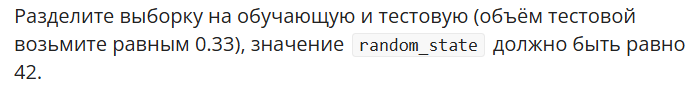

In [8]:
#Подгружаем необходимую библиотеку
from sklearn.model_selection import train_test_split

#Разделяем выбоорку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

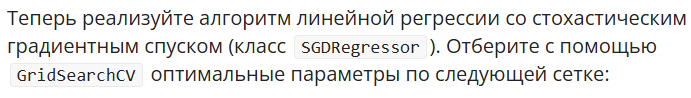

In [9]:
#Подгружаем необходимые библиотеки
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#Делаем словарь гиперпараметров параметров
param_grid = {"loss": ["squared_error", "epsilon_insensitive"],
              "penalty": ["elasticnet"],
              "alpha": np.logspace(-3, 3, 10),
              "l1_ratio": np.linspace(0, 1, 10),
              "learning_rate": ["constant"],
              "eta0": np.logspace(-4, -1, 4)
}

In [10]:
#Используем метод GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(
    estimator= SGDRegressor(random_state=42),
    param_grid=param_grid,
    n_jobs=-1
)

In [11]:
#Обучаем модель стохастического градиентного спуска
#с подобранными гиперпараметрами
grid_search.fit(X_train, y_train)

,estimator,SGDRegressor(random_state=42)
,param_grid,"{'alpha': array([1.0000...00000000e+03]), 'eta0': array([0.0001...01 , 0.1 ]), 'l1_ratio': array([0. ..., 1. ]), 'learning_rate': ['constant'], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'epsilon_insensitive'


In [12]:
#Делаем предсказание
y_pred = grid_search.predict(X_test)

In [13]:
#Подгружаем необходимую библиотеку
from sklearn.metrics import mean_squared_error
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))

MSE: 0.018


### Метод Ньютона

### Задание 3.1
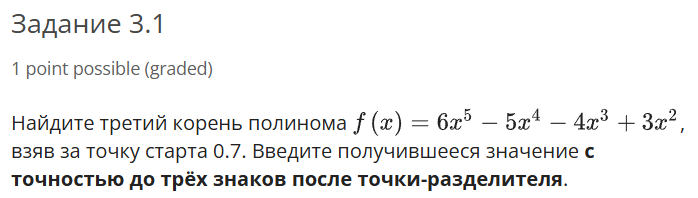

In [14]:
def func1(x):
    return 3*x**2 - 6*x - 45

def func2(x):
    return 6*x - 6

start_x = 42
iter_count = 0
new_x = start_x
epsilon = 0.0001
f = func1(new_x)

while (abs(f) > epsilon):
    f = func1(new_x)
    f_prime = func2(new_x)
    new_x = new_x - (f)/(f_prime)
    iter_count += 1
    print(round(new_x, 3))
print(iter_count)


21.695
11.734
7.112
5.365
5.015
5.0
5.0
5.0
8


Можно объединить всё в одну функцию:

In [15]:
def newtons_method (f, fprime, x0, tol=0.0001):
    iter_count = 0
    x_curr = x0
    f_val = f(x_curr)
    
    while (abs(f_val) > tol):
        f_val = f(x_curr)
        f_prime_val = fprime(x_curr)
        x_curr = x_curr - (f_val)/(f_prime_val)
        iter_count += 1
    return x_curr

newtons_method(f=func1, fprime=func2, x0=50, tol=0.0001)

5.0

А можно воспользоваться реализацией из библиотеки scipy:

In [16]:
from scipy.optimize import newton
newton(func=func1, fprime=func2, x0=50, tol=0.0001)

5.0

### Задание 3.6
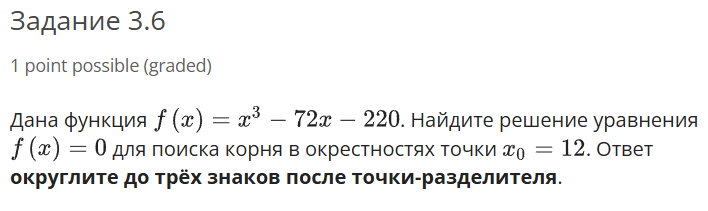

In [17]:
def func1(x):
    return x**3 - 72*x - 220

def func2(x):
    return 3*x**2 - 72

def newtons_method (f, fprime, x0, tol=0.0001):
    iter_count = 0
    x_curr = x0
    f_val = f(x_curr)
    
    while (abs(f_val) > tol):
        f_val = f(x_curr)
        f_prime_val = fprime(x_curr)
        x_curr = x_curr - (f_val)/(f_prime_val)
        iter_count += 1
    return round(x_curr, 3)

newtons_method(f=func1, fprime=func2, x0=12, tol=0.0001)

9.727

### Задание 3.7
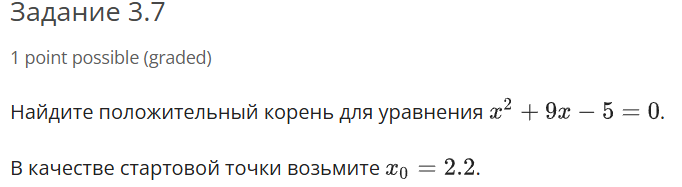

In [18]:
def func1(x):
    return x**2 + 9*x - 5

def func2(x):
    return 2*x + 9

def newtons_method (f, fprime, x0, tol=0.0001):
    iter_count = 0
    x_curr = x0
    f_val = f(x_curr)
    
    while (abs(f_val) > tol):
        f_val = f(x_curr)
        f_prime_val = fprime(x_curr)
        x_curr = x_curr - (f_val)/(f_prime_val)
        iter_count += 1
    return round(x_curr, 2)

newtons_method(f=func1, fprime=func2, x0=2.2, tol=0.0001)

0.52

### Задание 3.9
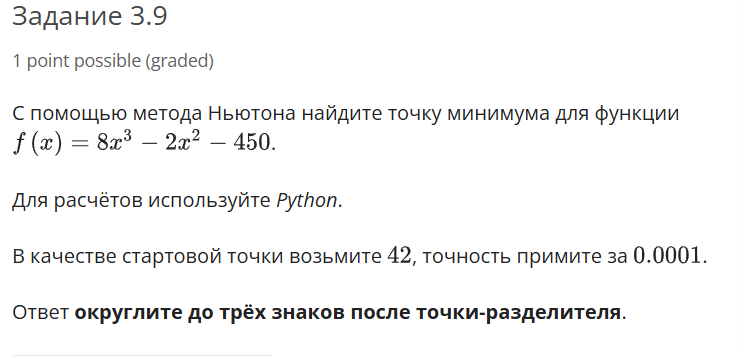

In [19]:
def func1(x):
    return 24*x**2 - 4*x

def func2(x):
    return 48*x - 4

def newtons_method (f, fprime, x0, tol=0.0001):
    iter_count = 0
    x_curr = x0
    f_val = f(x_curr)
    
    while (abs(f_val) > tol):
        f_val = f(x_curr)
        f_prime_val = fprime(x_curr)
        x_curr = x_curr - (f_val)/(f_prime_val)
        iter_count += 1
    return round(x_curr, 3)

newtons_method(f=func1, fprime=func2, x0=42, tol=0.0001)

0.167

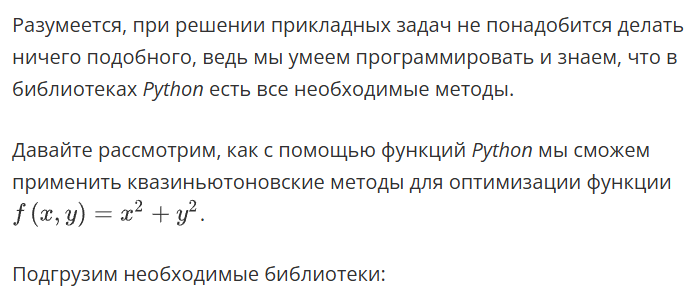

In [20]:
import numpy as np 
from scipy.optimize import minimize

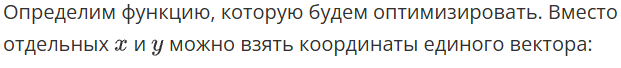

In [21]:
def func(x):
    return x[0]**2 + x[1]**2

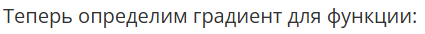

In [22]:
def grad_func(x):
    return np.array([x[0]*2, x[1]*2])

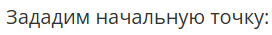

In [23]:
x_0 = [1.0, 1.0]

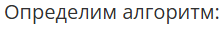

In [24]:
result = minimize(func, x_0, method='BFGS', jac=grad_func)

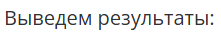

In [25]:
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %s' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 3
Решение: f([0. 0.]) = 0.00000


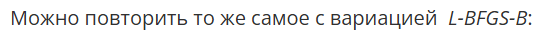

In [26]:
def func(x):
    return x[0]**2 + x[1]**2

def grad_func(x):
    return np.array([x[0]*2, x[1]*2])

x_0 = [1.0, 1.0]

result = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)

print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %s' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Количество оценок: 3
Решение: f([0. 0.]) = 0.00000


### Задание 4.1
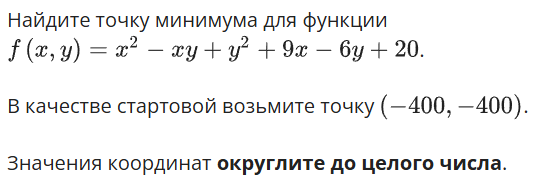

In [27]:
def func(x):
    return x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20

def grad_func(x):
    return np.array([2*x[0] - x[1] + 9, 2*x[1] - x[0] - 6])

x_0 = [-400, -400]

result = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)

print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %s' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution.round(), evaluation.round()))

Статус оптимизации CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Количество оценок: 9
Решение: f([-4.  1.]) = -1.00000


### Задание 4.4
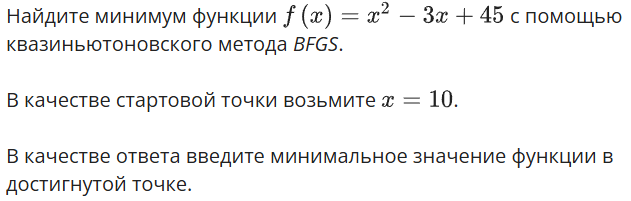

In [28]:
def func(x):
    return x**2 - 3*x + 45

def grad_func(x):
    return 2*x - 3

x_0 = 10

result = minimize(func, x_0, method='BFGS', jac=grad_func)

print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %s' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 5
Решение: f([1.5]) = 42.75000


### Задание 4.7
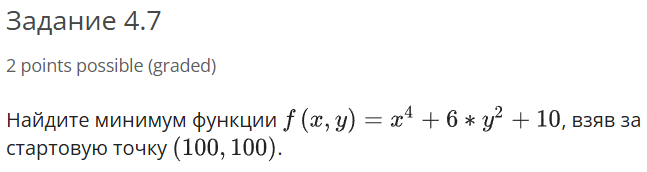

In [29]:
def func(x):
    return x[0]**4 + 6*x[1]**2 + 10

def grad_func(x):
    return np.array([4*x[0]**3, 12*x[1]])

x_0 = [100, 100]

result = minimize(func, x_0, method='BFGS', jac=grad_func)

print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %s' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution.round(), evaluation.round()))



def func(x):
    return x[0]**4 + 6*x[1]**2 + 10

def grad_func(x):
    return np.array([4*x[0]**3, 12*x[1]])

x_0 = [100, 100]

result = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)

print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %s' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution.round(), evaluation.round()))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 37
Решение: f([0. 0.]) = 10.00000
Статус оптимизации CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Количество оценок: 40
Решение: f([-0. -0.]) = 10.00000


## Практика: линейное программирование

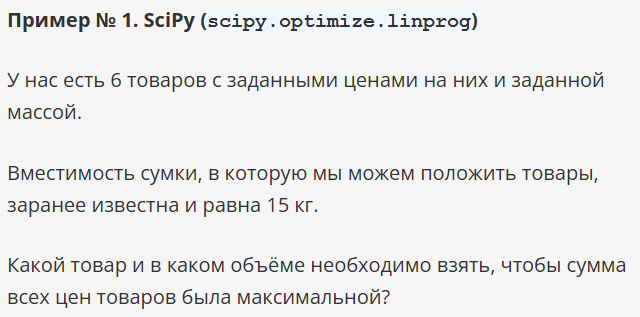

Создадим переменные на основе предположенных данных

In [30]:
#Стоимость товаров
values = [4, 2, 1, 7, 3, 6] 
#Вес товаров
weights = [5, 9, 8, 2, 6, 5]

#Вместоимость сумки
C = 15
#Количество товаров
n = 6

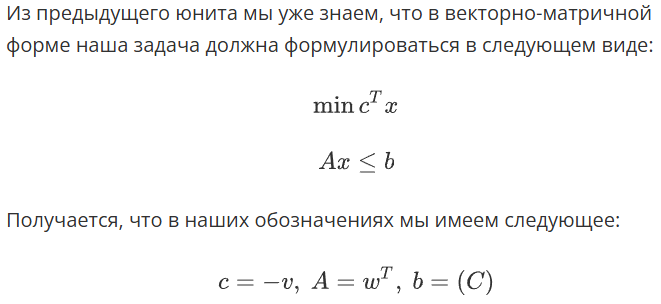
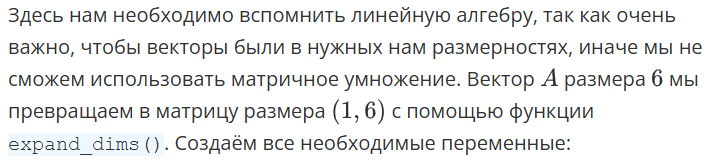

In [31]:
#Изменяем знак, чтобы перейти от задачи 
#максимизации к задаче минимизации
c = - np.array(values)

#Конвертируем список с весами в массив
A = np.array(weights)
#Преобразуем размерность массива
A = np.expand_dims(A, 0)

#Конвертируем вместимость в массив
b = np.array([C])

In [32]:
#Передаем подготовленные переменные в оптимизатор SciPy
from scipy.optimize import linprog
linprog(c=c, A_ub=A, b_ub=b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -52.5
              x: [ 0.000e+00  0.000e+00  0.000e+00  7.500e+00  0.000e+00
                   0.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  0.000e+00  7.500e+00
                              0.000e+00  0.000e+00]
                 marginals: [ 1.350e+01  2.950e+01  2.700e+01  0.000e+00
                              1.800e+01  1.150e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-3.500e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

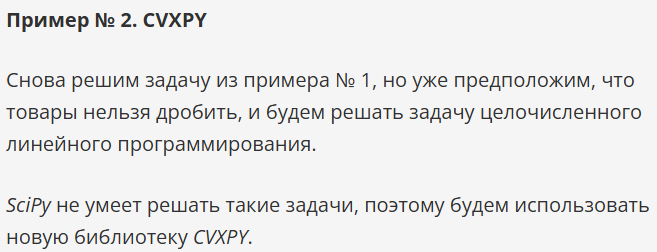

## *Выполнено в Google Colab*

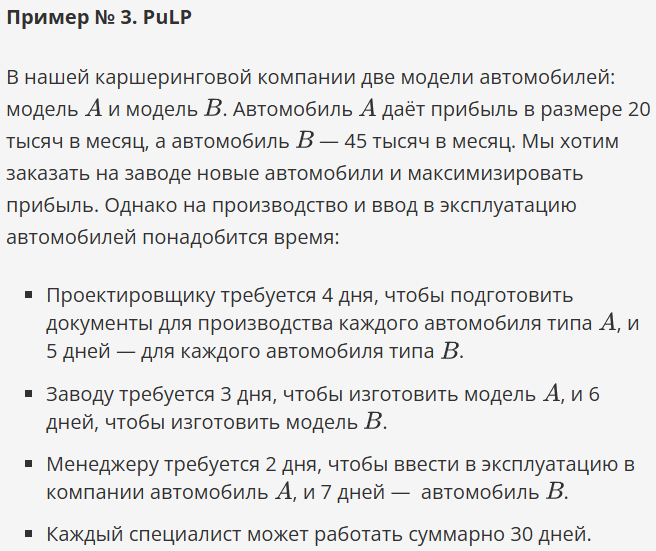

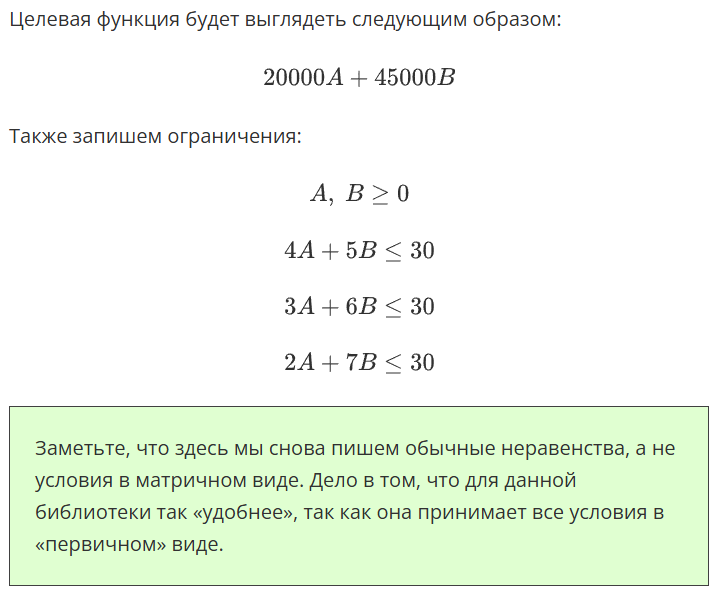

In [37]:
from pulp import *

problem = LpProblem('Производство машин', LpMaximize)
A = LpVariable('Автомобиль А', lowBound=0, cat=LpInteger)
B = LpVariable('Автомобиль B', lowBound=0, cat=LpInteger)
#Целевая функция
problem += 20000*A + 45000*B
#Ограничения
problem += 4*A + 5*B <=30
problem += 3*A + 6*B <=30
problem += 2*A + 7*B <=30
problem.solve()
print('Количество автомобилей А: ', A.varValue)
print('Количество автомобилей B: ', B.varValue)
print('Суммарный доход: ', value(problem.objective))

Количество автомобилей А:  1.0
Количество автомобилей B:  4.0
Суммарный доход:  200000.0


### Задание 6.1
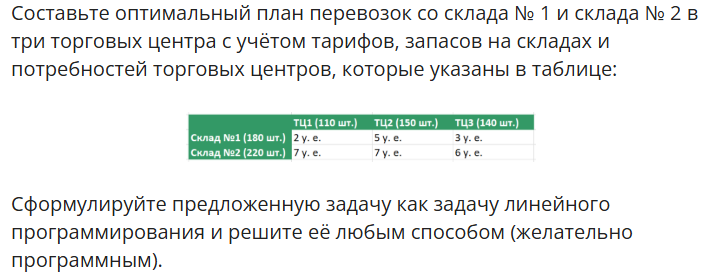

In [38]:
#Цена перевозки
price = np.array([
        [2, 5, 3],
        [7, 7, 6]
    ])
#Количество товаров на складе
S = np.array([180, 220])
#Количество товара в ТЦ
TC = np.array([110, 150, 140])
#Количество складов
num_S = 2
#Количество ТЦ
num_TC = 3

In [41]:
c = price.flatten()
print(c)

[2 5 3 7 7 6]


In [49]:
A = []
b = []
for i in range(0, num_S):
    A.append([0]* (num_TC*i) + [1]*num_TC + [0] * (num_TC * (num_S - i - 1)))
    b.append(S[i])
A = np.asarray(A)
b = np.asarray(b)
print(A)
print(b)

[[1 1 1 0 0 0]
 [0 0 0 1 1 1]]
[180 220]


In [50]:
A = A.tolist()
b = b.tolist()
for j in range(0, num_TC):
    A. append(([0] * j + [-1] + [0] * (num_TC - j - 1)) * num_S)
    b.append(-TC[j])
A = np.asarray(A)
b = np.asarray(b)
print(A)
print(b)

[[ 1  1  1  0  0  0]
 [ 0  0  0  1  1  1]
 [-1  0  0 -1  0  0]
 [ 0 -1  0  0 -1  0]
 [ 0  0 -1  0  0 -1]]
[ 180  220 -110 -150 -140]


In [51]:
linprog(c=c, A_ub=A, b_ub=b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 1900.0
              x: [ 1.100e+02  0.000e+00  7.000e+01  0.000e+00  1.500e+02
                   7.000e+01]
            nit: 5
          lower:  residual: [ 1.100e+02  0.000e+00  7.000e+01  0.000e+00
                              1.500e+02  7.000e+01]
                 marginals: [ 0.000e+00  1.000e+00  0.000e+00  2.000e+00
                              0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
                 marginals: [-3.000e+00 -0.000e+00 -5.00